# Network for the 17 MT-related genes DE


https://github.com/marcorusc  marcorusc/Pypath_pipeline


https://pypath.omnipathdb.org/notebooks/manual.html

In [1]:
#first import pypath and the omnipath module

from pypath.core import network  #pypath.core: contains the database classes e.g. network, complex, annotations, etc
from pypath.resources import network as netres
import pypath
from pypath import omnipath #pypath.omnipath: higher level applications, e.g. a database manager, a web server
print(pypath.__version__)

0.14.48


In [3]:
#then import the wrapper

%load_ext autoreload
%autoreload 2


import sys
sys.path.insert(0, "../src")
from pypath_wrapper import Wrap_net


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
w = Wrap_net()

#here we create the wrap_net object, which is the same as Network() but with a couple of functions more

# A. We load the database to populate the wrap_net object.

In [5]:
#here we load the database to populate the wrap_net object. It can be done in two ways:

#1) using the "netres" object
netres.omnipath

#in the output of the cells you can visualize the database that will populate your wrapnet object

{'trip': <NetworkResource: TRIP (post_translational, activity_flow)>,
 'spike': <NetworkResource: SPIKE (post_translational, activity_flow)>,
 'signalink3': <NetworkResource: SignaLink3 (post_translational, activity_flow)>,
 'guide2pharma': <NetworkResource: Guide2Pharma (post_translational, activity_flow)>,
 'ca1': <NetworkResource: CA1 (post_translational, activity_flow)>,
 'arn': <NetworkResource: ARN (post_translational, activity_flow)>,
 'nrf2': <NetworkResource: NRF2ome (post_translational, activity_flow)>,
 'macrophage': <NetworkResource: Macrophage (post_translational, activity_flow)>,
 'death': <NetworkResource: DeathDomain (post_translational, activity_flow)>,
 'pdz': <NetworkResource: PDZBase (post_translational, activity_flow)>,
 'signor': <NetworkResource: SIGNOR (post_translational, activity_flow)>,
 'adhesome': <NetworkResource: Adhesome (post_translational, activity_flow)>,
 'icellnet': <NetworkResource: ICELLNET (post_translational, activity_flow)>,
 'celltalkdb': <Net

In [6]:
#to load the previous databses just do:

w.load(netres.pathway)
w.load(netres.pathway_all)
#the load methods, loads the databases contained in the netres object

In [7]:
#now let's check its dimensions
w

<Network: 16137 nodes, 167967 interactions>

In [8]:
#and let's have a look to the interactions ( or nodes)
w.interactions #w.nodes

{(<Entity: TRPC1>,
  <Entity: KCNMA1>): <Interaction: TRPC1 ============= KCNMA1 [Evidences: TRIP (2 references)]>,
 (<Entity: TRPC1>,
  <Entity: PPP3CA>): <Interaction: TRPC1 ============= PPP3CA [Evidences: TRIP (1 references)]>,
 (<Entity: CALM2>,
  <Entity: TRPC1>): <Interaction: CALM2 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: CALM3>,
  <Entity: TRPC1>): <Interaction: CALM3 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: CALM1>,
  <Entity: TRPC1>): <Interaction: CALM1 =======(-)==> TRPC1 [Evidences: TRIP (3 references)]>,
 (<Entity: CASP1>,
  <Entity: TRPC1>): <Interaction: CASP1 ============= TRPC1 [Evidences: TRIP (1 references)]>,
 (<Entity: TRPC1>,
  <Entity: CACNA1C>): <Interaction: TRPC1 ============= CACNA1C [Evidences: TRIP (1 references)]>,
 (<Entity: TRPC1>,
  <Entity: CAV1>): <Interaction: TRPC1 <=(+)======== CAV1 [Evidences: TRIP (7 references)]>,
 (<Entity: TRPC1>,
  <Entity: CAV3>): <Interaction: TRPC1 ============= CAV3 [Evid

In [9]:
w.get_neighbours("MAPRE1")

['CEP250',
 'CEP43',
 'CEP135',
 'CLASP2',
 'DCTN3',
 'DCTN1',
 'CEP76',
 'CEP152',
 'CDK5RAP2',
 'ACTR1A',
 'ODF2',
 'OFD1',
 'DYNLL1',
 'CEP57',
 'NEK2',
 'PPP2R1A',
 'SFI1',
 'CETN2',
 'TUBB4B',
 'IKBKE',
 'DCTN2',
 'TUBB',
 'CEP41',
 'EPB41',
 'CEP78',
 'CNTRL',
 'GH1',
 'DYNC1H1',
 'TERF1',
 'CKAP5',
 'CENPJ',
 'APC',
 'PCNT',
 'PCM1',
 'MCC',
 'PRKACA',
 'CDK1',
 'CCP110',
 'SDCCAG8',
 'CLASP1',
 'EIF1B',
 'CEP290',
 'NINL',
 'CSNK1D',
 'SSNA1',
 'CLIP1',
 'TRAF6',
 'PLK1',
 'PLK4',
 'TUBA1A',
 'CSH1',
 'TUBB4A',
 'CSNK1E',
 'CEP131',
 'TUBG1',
 'HAUS2',
 'YWHAE',
 'PAFAH1B1',
 'HLA-C',
 'CEP70',
 'YWHAG',
 'DYNC1I2',
 'ALMS1',
 'AKAP9',
 'CEP72',
 'HLA-B',
 'CEP164',
 'NDE1',
 'HSP90AA1',
 'PRKAR2B',
 'TUBA4A',
 'NEDD1',
 'CEP63']

In [10]:
w.get_neighbours("MTUS1")

['PARP1']

In [11]:
ia = w.interaction('MAPK1', 'MAPT')
ia

ia.get_references()


{<Reference: 10737616>, <Reference: 7488031>, <Reference: 8166686>}

In [12]:
from pypath.utils import mapping
import pandas as pd

# make a dataframe
w.make_df()
df_w = w.df
df_w.shape

(179636, 10)

# B. SECOND PART: FROM A LIST OF GENES TO A  FILE

In [13]:
genes_17 = ["ASPM","AURKB","GTSE1","KIF11","KIF14","KIF15","KIF18B","KIF20A","KIF2C","KIF4A","KIFC1","MAPT","MAST4","MTUS1","RACGAP1","STMN1","TPX2"]

# we can have easily uniprot

from pypath.utils import mapping


uniprot_17 = []
for gene in genes_17:
    uniprot = list(mapping.map_name(gene, 'genesymbol', 'uniprot'))
    genesymbol = list(mapping.map_name(uniprot[0], 'uniprot', 'genesymbol'))
    print(uniprot, genesymbol)
    uniprot_17.append(uniprot[0])
print(uniprot_17)

['Q8IZT6'] ['ASPM']
['Q96GD4'] ['AURKB']
['Q9NYZ3'] ['GTSE1']
['P52732'] ['KIF11']
['Q15058'] ['KIF14']
['Q9NS87'] ['KIF15']
['Q86Y91'] ['KIF18B']
['O95235'] ['KIF20A']
['Q99661'] ['KIF2C']
['O95239'] ['KIF4A']
['Q9BW19'] ['KIFC1']
['P10636'] ['MAPT']
['O15021'] ['MAST4']
['Q9ULD2'] ['MTUS1']
['Q9H0H5'] ['RACGAP1']
['P16949'] ['STMN1']
['Q9ULW0'] ['TPX2']
['Q8IZT6', 'Q96GD4', 'Q9NYZ3', 'P52732', 'Q15058', 'Q9NS87', 'Q86Y91', 'O95235', 'Q99661', 'O95239', 'Q9BW19', 'P10636', 'O15021', 'Q9ULD2', 'Q9H0H5', 'P16949', 'Q9ULW0']


## 1) graph des 1er voisins avec 17 genes DE

In [14]:
for i in df_w.index:
    df_w.loc[i,'node_present'] = (df_w.loc[i,'id_a'] in uniprot_17) or  (df_w.loc[i,'id_b'] in uniprot_17)

In [15]:
df_17 = df_w[df_w['node_present'] == True]
df_17


,id_a,id_b,type_a,type_b,directed,effect,type,dmodel,sources,references,node_present
123,P16949,Q9UL62,protein,protein,False,0,post_translational,{activity_flow},{TRIP},NaN,True
3589,P09874,Q96GD4,protein,protein,True,-1,post_translational,{activity_flow},"{SPIKE, SPIKE_LC}",NaN,True
3665,O95239,O43663,protein,protein,True,1,post_translational,{activity_flow},"{SPIKE, SPIKE_LC, SIGNOR}",NaN,True
3771,P04637,Q9NYZ3,protein,protein,True,1,post_translational,{activity_flow},"{SPIKE, SPIKE_LC, Wang}",NaN,True
3772,Q9NYZ3,P04637,protein,protein,True,-1,post_translational,{activity_flow},"{SPIKE, SPIKE_LC}",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
178501,P10636,P23443,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,True
178816,P62993,Q9ULW0,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,True
178873,Q16537,Q9H0H5,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,True
179246,P16949,Q99828,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,True


In [16]:
from pypath.utils import mapping
import pandas as pd

# add name of the proteins

for i in df_17.index:
    if df_17.loc[i,"type_a"] == "protein":
        df_17.loc[i,"HGNC_a"] = list(mapping.map_name(df_17.loc[i,"id_a"], 'uniprot', 'genesymbol'))[0]
    else: #complex
        l = "COMPLEX:"
        for t in df_17.loc[i,"id_a"]:
            l+="_"+str(list(mapping.map_name(t, 'uniprot', 'genesymbol'))[0])
        df_17.loc[i,"HGNC_a"] = l

for i in df_17.index:
    if df_17.loc[i,"type_b"] == "protein":
        df_17.loc[i,"HGNC_b"] = list(mapping.map_name(df_17.loc[i,"id_b"], 'uniprot', 'genesymbol'))[0]
    else: #complex
        l = "COMPLEX:"
        for t in df_17.loc[i,"id_b"]:
            l+="_"+str(list(mapping.map_name(t, 'uniprot', 'genesymbol'))[0])
        df_17.loc[i,"HGNC_b"] = l

# remove when sources = {Wang}
df_17 = df_17[df_17['sources'] != {'Wang'}]

# to find our 17 genes
for i in df_17.index:
    df_17.loc[i,'node_source_present'] = (df_17.loc[i,'HGNC_a'] in genes_17)
    df_17.loc[i,'node_end_present'] =  (df_17.loc[i,'HGNC_b'] in genes_17)


# remove colums type	
df_17 = df_17.drop(columns=['type_a', 'type_b','directed','type','dmodel',  'references'])
df_17

/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_43473/2395523397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17.loc[i,"HGNC_a"] = list(mapping.map_name(df_17.loc[i,"id_a"], 'uniprot', 'genesymbol'))[0]
/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_43473/2395523397.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17.loc[i,"HGNC_b"] = list(mapping.map_name(df_17.loc[i,"id_b"], 'uniprot', 'genesymbol'))[0]
/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_4347

,id_a,id_b,effect,sources,node_present,HGNC_a,HGNC_b,node_source_present,node_end_present
123,P16949,Q9UL62,0,{TRIP},True,STMN1,TRPC5,True,False
3589,P09874,Q96GD4,-1,"{SPIKE, SPIKE_LC}",True,PARP1,AURKB,False,True
3665,O95239,O43663,1,"{SPIKE, SPIKE_LC, SIGNOR}",True,KIF4A,PRC1,True,False
3771,P04637,Q9NYZ3,1,"{SPIKE, SPIKE_LC, Wang}",True,TP53,GTSE1,False,True
3772,Q9NYZ3,P04637,-1,"{SPIKE, SPIKE_LC}",True,GTSE1,TP53,True,False
...,...,...,...,...,...,...,...,...,...
178501,P10636,P23443,0,{SPIKE_LC},True,MAPT,RPS6KB1,True,False
178816,P62993,Q9ULW0,0,{SPIKE_LC},True,GRB2,TPX2,False,True
178873,Q16537,Q9H0H5,0,{SPIKE_LC},True,PPP2R5E,RACGAP1,False,True
179246,P16949,Q99828,0,{SPIKE_LC},True,STMN1,CIB1,True,False


In [17]:
df_17[df_17["HGNC_b"]=="MAPK1"]
df_17[df_17["HGNC_a"]=="YWHAB"]

,id_a,id_b,effect,sources,node_present,HGNC_a,HGNC_b,node_source_present,node_end_present
157282,P31946,Q9H0H5,0,{SPIKE_LC},True,YWHAB,RACGAP1,False,True


In [ ]:
# save to csv (use Cytoscape to visualize the graph and its properties)
#df_17.to_csv("df_graph_17.csv")

### there are too many not connected neighbours

In [18]:
# node degree

import numpy as np
# we want the nodes that appear in only one line
df_count_a = pd.DataFrame(df_17["HGNC_a"].value_counts())
df_count_b = pd.DataFrame(df_17["HGNC_b"].value_counts())

df_count = pd.merge(df_count_a, df_count_b, how='outer', left_index=True, right_index=True)
df_count["count"] = np.nansum(df_count, axis=1)

df_count = df_count.sort_values(by=['count'], ascending=False)
df_count


,count_x,count_y,count
AURKB,56.0,32.0,88.0
MAPT,18.0,46.0,64.0
STMN1,10.0,17.0,27.0
RACGAP1,3.0,18.0,21.0
TPX2,5.0,10.0,15.0
...,...,...,...
HLA-B,1.0,NaN,1.0
HMMR,NaN,1.0,1.0
HSPA5,1.0,NaN,1.0
HSPA8,1.0,NaN,1.0


In [19]:
# table of nodes with degree 1
df1 = df_count[df_count["count"]==1].sort_index()
df1

,count_x,count_y,count
AATF,NaN,1.0,1.0
ABL1,1.0,NaN,1.0
AGFG1,NaN,1.0,1.0
AHSA1,1.0,NaN,1.0
ANKZF1,NaN,1.0,1.0
...,...,...,...
WWC1,1.0,NaN,1.0
YWHAG,1.0,NaN,1.0
YWHAZ,NaN,1.0,1.0
YY1,NaN,1.0,1.0


In [20]:
# we want the nodes that appear in only one line
df1 = df1.reset_index()
df1 = df1.rename(columns={"index": "HGNC_a"})
df1

,HGNC_a,count_x,count_y,count
0,AATF,NaN,1.0,1.0
1,ABL1,1.0,NaN,1.0
2,AGFG1,NaN,1.0,1.0
3,AHSA1,1.0,NaN,1.0
4,ANKZF1,NaN,1.0,1.0
...,...,...,...,...
161,WWC1,1.0,NaN,1.0
162,YWHAG,1.0,NaN,1.0
163,YWHAZ,NaN,1.0,1.0
164,YY1,NaN,1.0,1.0


In [21]:
# we look if these nodes are in our list of 17 genes
df1[df1["HGNC_a"]=="KIF23"]
df1[df1["HGNC_a"]=="KIF2A"]
df1[df1["HGNC_a"]=="MAPRE1"] # not present
df1[df1["HGNC_a"]=="PSRC1"] # not present
#
#df1[df1["HGNC_a"]=="CENPE"]
#df1[df1["HGNC_a"]=="COMPLEX:_KIF2C_KIF18B"]
df1[df1["HGNC_a"]=="YWHAB"] # not present

,HGNC_a,count_x,count_y,count


### Before removing the nodes, I will look at their normal vs. breast cancer (BC) expression and whether they are in the 280 MT-related genes.

### I only keep those that are in the 280 differentially expressed MT-related genes.
### + CENPE that is not in the 411 MT

In [22]:
# we look if the nodes in df_nodes are in df_280
df_280 = pd.read_csv('../data/280-MT-related-genes.csv',sep=';')
df_280.head()

,Symbol,Entrez Gene Name,Entrez Gene ID for Human,Unnamed: 3,Unnamed: 4
0,AGTPBP1,ATP/GTP binding protein 1,23287,NaN,NaN
1,AMER2,APC membrane recruitment protein 2,219287,NaN,NaN
2,ANXA11,annexin A11,311,NaN,NaN
3,ANXA5,annexin A5,308,NaN,NaN
4,APC,adenomatous polyposis coli,324,NaN,NaN


In [23]:
df1["dans_280"] = df1["HGNC_a"].apply(lambda x: x in df_280["Symbol"].values)

df2 = pd.concat([df1[df1["dans_280"]], df1[df1["HGNC_a"]=="CENPE"]])
df2.head()

,HGNC_a,count_x,count_y,count,dans_280
16,CDK2,1.0,NaN,1.0,True
17,CDK4,1.0,NaN,1.0,True
29,CLASP1,NaN,1.0,1.0,True
39,CSNK1D,1.0,NaN,1.0,True
41,DCTN1,NaN,1.0,1.0,True


In [27]:
# load the dataframe
df_results =   pd.read_csv("../data/df_DEG_normal_vs_tumor.csv", index_col=0)
df_results.head()

,HGNC_a,p-value,log2FC,log2FC2
0,ASPM,9.670000e-20,12.06,14.66
1,ATM,2.680000e-07,0.72,0.77
2,AURKA,5.290000e-20,8.21,7.01
3,AURKB,5.980000e-19,8.05,8.05
4,CAMK2A,4.430000e-08,0.24,2.25


In [28]:
# we merge df_results and df2 on the HGNC_a column
df3 = pd.merge(df_results, df2, how='inner', left_on='HGNC_a', right_on='HGNC_a')
df3["up_down"] = df3.apply(lambda x: 3 if (x[1]<0.05 and x[3] >=5) else 2 if (x[1]<0.05 and x[3]>=2) else -2 if (x[1]<0.05 and x[3]<=0.5)  else -1 if (x[1]<0.05 and x[3]<=2/3)else 0, axis=1)
df3 = df3[df3["up_down"] != 0]
df3

,HGNC_a,p-value,log2FC,log2FC2,count_x,count_y,count,dans_280,up_down
1,CENPE,5.320000e-19,6.28,5.00,NaN,1.0,1.0,False,3
5,DIAPH2,2.090000e-08,0.58,0.55,NaN,1.0,1.0,True,-1
6,FYN,9.420000e-09,0.58,0.56,1.0,NaN,1.0,True,-1
8,KIF23,1.150000e-19,5.92,5.42,NaN,1.0,1.0,True,3
14,TUBB3,6.750000e-19,11.03,7.75,NaN,1.0,1.0,True,3
21,LRRK2,3.770000e-08,0.72,0.54,1.0,NaN,1.0,True,-1
23,MARK1,4.790000e-10,0.48,0.39,1.0,NaN,1.0,True,-2
25,PRKAA1,8.240000e-07,0.72,0.66,1.0,NaN,1.0,True,-1
31,TTBK1,4.450000e-08,3.05,2.00,1.0,NaN,1.0,True,2


In [29]:
# we merge df_results and df1 to find the nodes in df1 that are not in df_results
df4 = pd.merge(df_results, df2, how='outer', left_on='HGNC_a', right_on='HGNC_a')
# not in df1
# print the genes not in df1


df4 = df4[df4["p-value"].isna()]
print(df4.shape)
for g in df4["HGNC_a"].to_list():
    print(g)


(0, 8)


### I clean df1 of the nodes I don't want to remove

1. I remove the degree 1 nodes, which are in 280 mT-related genes and differentially expressed (to keep them in the final network)

2. I remove CDK4 (to connect with ASPM), the KIF2C_KIF18B complex (2 DEGs), and KIF2A (to connect MTUS1)


In [30]:
print(df1.shape)
for g in df3["HGNC_a"].to_list():
    df1 = df1[df1["HGNC_a"]!=g]
print(df1.shape)

(166, 5)
(157, 5)


In [31]:
df1 = df1[df1["HGNC_a"]!="CDK4"]

df1 = df1[df1["HGNC_a"]!="COMPLEX:_KIF2C_KIF18B"]

df1 = df1[df1["HGNC_a"]!="KIF2A"]
print(df1.shape)


(154, 5)


### I remove all nodes with only 1 neighbor from df_17 that are in df1

In [32]:
print(df_17.shape)
df_17_2 = df_17[~df_17["HGNC_a"].isin(df1["HGNC_a"]) & ~df_17["HGNC_b"].isin(df1["HGNC_a"])]
print(df_17_2.shape)
df_17_2[df_17_2["HGNC_b"]=="DIAPH2"]


(253, 9)
(99, 9)


,id_a,id_b,effect,sources,node_present,HGNC_a,HGNC_b,node_source_present,node_end_present
81720,Q96GD4,O60879,1,{SIGNOR},True,AURKB,DIAPH2,True,False


In [ ]:
#df_17_2.to_csv("df_graph_17_qq_1voisin_2.csv")

#### there are still nodes with double arrows, I remove them:

In [ ]:
A_enlever = ["H3C12","TUBA1B","GSK3B","PPP2CA","CENPA","H3C4","INCENP","BIRC5","DES","GFAP","NDC80","COMPLEX:_PPP1CA_PPP1CB_PPP1CC"]
df_17_3 = df_17_2[~df_17_2["HGNC_a"].isin(A_enlever) & ~df_17_2["HGNC_b"].isin(A_enlever)]
#df_17_3.to_csv("df_graph_17_qq_1voisin_3.csv")


### "manual" addition (MTUS1 interacts with "KIF2A"),
### "manual" addition of KIF18B (interacts with KIF2C) (and MAPRE1, no because Mapre1 is not in the network)

KIF18B :    Interacts with MAPRE1; this interaction is required for efficient accumulation at microtubule plus ends. https://pubmed.ncbi.nlm.nih.gov/21737685/ <br>
            Interacts with KIF2C at microtubule tips; this interaction increases the affinity of both partners for microtubule plus ends and is required for robust microtubule depolymerization. https://www.uniprot.org/uniprotkb/Q86Y91/entry  <br>
            (KIF2C phosphorylation by AURKA or AURKB strongly reduces KIF18B-binding)  <br>

In [34]:
#add MTUS1
df5 = pd.DataFrame({'id_a':["O00139"] , 'id_b': ["Q9ULD2"], 'effect': [-2],'sources': 'main', 'HGNC_a': ["KIF2A"], 'HGNC_b': ["MTUS1"]})
df_17_3 = pd.concat([df_17_3, df5], ignore_index=True)
#add KIF18B
df5 = pd.DataFrame({'id_a':["Q99661"] , 'id_b': ["Q86Y91"], 'effect': [-2],'sources': 'main',  'HGNC_a': ["KIF2C"], 'HGNC_b':  ["KIF18B"]})
df_17_3 = pd.concat([df_17_3, df5], ignore_index=True)
df_17_3[df_17_3["HGNC_b"]=="DIAPH2"]


,id_a,id_b,effect,sources,node_present,HGNC_a,HGNC_b,node_source_present,node_end_present
51,Q96GD4,O60879,1,{SIGNOR},True,AURKB,DIAPH2,True,False


In [35]:
df_17_3.shape

(78, 9)

### we take all the nodes of the previous network obtained and we connect the nodes which are not in the initial list of 20 genes between them by searching in the database all the nodes at distance 1

In [36]:
# all genes in the network except COMPLEX
all_nodes  = list(set(df_17_3["HGNC_a"].values) | set(df_17_3["HGNC_b"].values))
print("nodes number (with complex)",len(all_nodes))
for elt in all_nodes:
    if 'COMPLEX'  in elt:
        all_nodes.remove(elt)
print("nodes number (without complex)",len(all_nodes))
# we can have easily uniprot
uniprot_all_nodes = []
for gene in all_nodes:
    uniprot = list(mapping.map_name(gene, 'genesymbol', 'uniprot'))
    try : 
        genesymbol = list(mapping.map_name(uniprot[0], 'uniprot', 'genesymbol'))
        uniprot_all_nodes.append(uniprot[0])
    except:
        print(uniprot, genesymbol)
        uniprot_all_nodes.append("P29323")
    
print(uniprot_all_nodes)

nodes number (with complex) 49
nodes number (without complex) 46
['O95235', 'Q15058', 'Q96GD4', 'Q5TCY1', 'Q13131', 'Q00535', 'Q86Y91', 'P29323', 'P62993', 'Q9ULD2', 'P04637', 'Q8IZT6', 'Q9BW19', 'O95239', 'Q13554', 'Q13315', 'P28482', 'Q02224', 'Q9NS87', 'O14578', 'P10636', 'P17612', 'O43663', 'P06493', 'Q9UQM7', 'O14965', 'P31946', 'P16949', 'O15021', 'P53350', 'Q9ULW0', 'Q13509', 'Q02241', 'P52732', 'Q99661', 'Q9H0H5', 'P11802', 'Q13153', 'P08670', 'P45983', 'O00139', 'Q5S007', 'O60879', 'Q9P0L2', 'P06241', 'Q9NYZ3']


In [37]:
for i in df_w.index:
    df_w.loc[i,'node_present_all'] = (df_w.loc[i,'id_a'] in uniprot_all_nodes) or  (df_w.loc[i,'id_b'] in uniprot_all_nodes)

In [38]:
# new net redo with distance = 1 and "all nodes"
df_graph_all_nodes = df_w[df_w['node_present_all'] == True]
df_graph_all_nodes

,id_a,id_b,type_a,type_b,directed,effect,type,dmodel,sources,references,node_present,node_present_all
101,P06241,Q9UBN4,protein,protein,False,0,post_translational,{activity_flow},{TRIP},NaN,False,True
123,P16949,Q9UL62,protein,protein,False,0,post_translational,{activity_flow},{TRIP},NaN,True,True
144,P06241,Q9Y210,protein,protein,True,1,post_translational,{activity_flow},{TRIP},NaN,False,True
145,P06241,Q9Y210,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,False,True
155,P17612,Q9Y210,protein,protein,False,0,post_translational,{activity_flow},{TRIP},NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
179536,P08670,Q96C92,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,False,True
179551,P26651,P31946,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,False,True
179564,P31946,Q92538,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,False,True
179569,Q02241,Q9NR09,protein,protein,False,0,post_translational,{activity_flow},{SPIKE_LC},NaN,False,True


In [39]:
# add name of the proteins
for i in df_graph_all_nodes.index:
    if df_graph_all_nodes.loc[i,"type_a"] == "protein":
        df_graph_all_nodes.loc[i,"HGNC_a"] = list(mapping.map_name(df_graph_all_nodes.loc[i,"id_a"], 'uniprot', 'genesymbol'))[0]
    else: #complex
        l = "COMPLEX:"
        for t in df_graph_all_nodes.loc[i,"id_a"]:
            l+="_"+str(list(mapping.map_name(t, 'uniprot', 'genesymbol'))[0])
        df_graph_all_nodes.loc[i,"HGNC_a"] = l

for i in df_graph_all_nodes.index:
    if df_graph_all_nodes.loc[i,"type_b"] == "protein":
        df_graph_all_nodes.loc[i,"HGNC_b"] = list(mapping.map_name(df_graph_all_nodes.loc[i,"id_b"], 'uniprot', 'genesymbol'))[0]
    else: #complex
        l = "COMPLEX:"
        for t in df_graph_all_nodes.loc[i,"id_b"]:
            try:
                l+="_"+str(list(mapping.map_name(t, 'uniprot', 'genesymbol'))[0])
            except:
                l = "pb"
        df_graph_all_nodes.loc[i,"HGNC_b"] = l

# remove when sources = {Wang}
df_graph_all_nodes = df_graph_all_nodes[df_graph_all_nodes['sources'] != {'Wang'}]

# to find our 17 genes DE
#for i in df_graph_all_nodes.index:
#    df_graph_all_nodes.loc[i,'node_source_present'] = (df_graph_all_nodes.loc[i,'HGNC_a'] in genes_17)
#    df_graph_all_nodes.loc[i,'node_end_present'] =  (df_graph_all_nodes.loc[i,'HGNC_b'] in genes_17)

# remove colums type	
df_graph_all_nodes = df_graph_all_nodes.drop(columns=['type_a', 'type_b','directed','type','dmodel',  'references'])
df_graph_all_nodes

/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_43473/1186719133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph_all_nodes.loc[i,"HGNC_a"] = list(mapping.map_name(df_graph_all_nodes.loc[i,"id_a"], 'uniprot', 'genesymbol'))[0]
/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_43473/1186719133.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph_all_nodes.loc[i,"HGNC_b"] = list(mapping.map_name(df_graph_all_nodes.loc[i,"id_b"], 'uniprot', 'genesymbol'))[0]


,id_a,id_b,effect,sources,node_present,node_present_all,HGNC_a,HGNC_b
101,P06241,Q9UBN4,0,{TRIP},False,True,FYN,TRPC4
123,P16949,Q9UL62,0,{TRIP},True,True,STMN1,TRPC5
144,P06241,Q9Y210,1,{TRIP},False,True,FYN,TRPC6
145,P06241,Q9Y210,0,{SPIKE_LC},False,True,FYN,TRPC6
155,P17612,Q9Y210,0,{TRIP},False,True,PRKACA,TRPC6
...,...,...,...,...,...,...,...,...
179536,P08670,Q96C92,0,{SPIKE_LC},False,True,VIM,ENTR1
179551,P26651,P31946,0,{SPIKE_LC},False,True,ZFP36,YWHAB
179564,P31946,Q92538,0,{SPIKE_LC},False,True,YWHAB,GBF1
179569,Q02241,Q9NR09,0,{SPIKE_LC},False,True,KIF23,BIRC6


In [40]:
df_graph_all_nodes[df_graph_all_nodes["HGNC_b"]== "pb"]

,id_a,id_b,effect,sources,node_present,node_present_all,HGNC_a,HGNC_b


In [41]:
df_graph_all_nodes[(df_graph_all_nodes["HGNC_a"]== "TP53") &(df_graph_all_nodes["HGNC_b"]== "ATM")]

,id_a,id_b,effect,sources,node_present,node_present_all,HGNC_a,HGNC_b
4434,P04637,Q13315,1,"{Cui2007, Wang}",False,True,TP53,ATM


In [42]:
### we extract from this new df, the interactions whose nodes are in all_nodes (nodes of the old network)
df_graph_all_nodes_only = df_graph_all_nodes[df_graph_all_nodes['HGNC_a'].isin(all_nodes) & df_graph_all_nodes['HGNC_b'].isin(all_nodes)]
# we remove node_present	node_present_all
df_graph_all_nodes_only = df_graph_all_nodes_only.drop(columns=['node_present', 'node_present_all'])
df_graph_all_nodes_only

,id_a,id_b,effect,sources,HGNC_a,HGNC_b
453,P04637,O43663,-1,"{SPIKE, SPIKE_LC, Wang}",TP53,PRC1
1714,Q13315,P53350,-1,"{SPIKE, SPIKE_LC}",ATM,PLK1
3665,O95239,O43663,1,"{SPIKE, SPIKE_LC, SIGNOR}",KIF4A,PRC1
3771,P04637,Q9NYZ3,1,"{SPIKE, SPIKE_LC, Wang}",TP53,GTSE1
3772,Q9NYZ3,P04637,-1,"{SPIKE, SPIKE_LC}",GTSE1,TP53
...,...,...,...,...,...,...
172718,Q13554,Q9UQM7,0,{SPIKE_LC},CAMK2B,CAMK2A
172831,P06241,P06493,0,{SPIKE_LC},FYN,CDK1
175266,P11802,Q8IZT6,0,{SPIKE_LC},CDK4,ASPM
176078,P31946,Q02241,0,{SPIKE_LC},YWHAB,KIF23


In [43]:
# we merge df_graph_all_nodes_only and df_17_3
df_graph_all_nodes_only_merge_17genes_3 = pd.concat([df_graph_all_nodes_only, df_17_3], ignore_index=True)
df_graph_all_nodes_only_merge_17genes_3.drop(columns=['node_present','node_source_present', 'node_end_present'], inplace=True)
df_graph_all_nodes_only_merge_17genes_3 

,id_a,id_b,effect,sources,HGNC_a,HGNC_b
0,P04637,O43663,-1,"{SPIKE, SPIKE_LC, Wang}",TP53,PRC1
1,Q13315,P53350,-1,"{SPIKE, SPIKE_LC}",ATM,PLK1
2,O95239,O43663,1,"{SPIKE, SPIKE_LC, SIGNOR}",KIF4A,PRC1
3,P04637,Q9NYZ3,1,"{SPIKE, SPIKE_LC, Wang}",TP53,GTSE1
4,Q9NYZ3,P04637,-1,"{SPIKE, SPIKE_LC}",GTSE1,TP53
...,...,...,...,...,...,...
206,P06493,Q9H0H5,0,{SPIKE_LC},CDK1,RACGAP1
207,P11802,Q8IZT6,0,{SPIKE_LC},CDK4,ASPM
208,P62993,Q9ULW0,0,{SPIKE_LC},GRB2,TPX2
209,O00139,Q9ULD2,-2,main,KIF2A,MTUS1


In [44]:
# we remove all effects = 0
#df_graph_all_nodes_only_merge_17genes_3 = df_graph_all_nodes_only_merge_17genes_3[df_graph_all_nodes_only_merge_17genes_3['effect'] != 0]
#df_graph_all_nodes_only_merge_17genes_3

In [45]:
# find all sources
list_sources = df_graph_all_nodes_only_merge_17genes_3['sources'].to_list()
set_sources = []
for elt in list_sources:
    for name in elt:
        if name not in set_sources :
            set_sources.append(name)
set_sources[:-4]

['SPIKE',
 'SPIKE_LC',
 'Wang',
 'SIGNOR',
 'Cui2007',
 'KEGG',
 'Macrophage',
 'CA1',
 'KEGG-MEDICUS',
 'Adhesome']

#### some interactions are in both directions (-1 and 1), we only keep those which are in SIGNOR

In [46]:
# we make a new dataframe with unique pairs of hgnc_a and hgnc_b while keeping the different effects
df_graph_all_nodes_only_merge_17genes_3_unique = df_graph_all_nodes_only_merge_17genes_3.groupby(['HGNC_a','HGNC_b']).agg({'effect': lambda x: list(x), 'sources': lambda x: list(x)}).reset_index()
df_graph_all_nodes_only_merge_17genes_3_unique

,HGNC_a,HGNC_b,effect,sources
0,ATM,AURKA,[0],[{SPIKE_LC}]
1,ATM,KIF11,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]"
2,ATM,KIF2C,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]"
3,ATM,MAST4,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]"
4,ATM,PLK1,[-1],"[{SPIKE, SPIKE_LC}]"
...,...,...,...,...
123,VIM,KIF15,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]"
124,VIM,PAK1,"[1, 0]","[{Adhesome}, {SIGNOR}]"
125,VIM,PRKACA,[0],[{Adhesome}]
126,YWHAB,KIF23,[0],[{SPIKE_LC}]


In [47]:
# we search in df_graph_all_nodes_only_merge_17genes_3_unique when effect is of size >= 1
df_graph_all_nodes_only_merge_17genes_3_unique["effect_size"] = df_graph_all_nodes_only_merge_17genes_3_unique["effect"].apply(lambda x: len(x))
df_graph_all_nodes_only_merge_17genes_3_unique[df_graph_all_nodes_only_merge_17genes_3_unique["effect_size"]>=2]

,HGNC_a,HGNC_b,effect,sources,effect_size
1,ATM,KIF11,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]",2
2,ATM,KIF2C,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]",2
3,ATM,MAST4,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]",2
5,ATM,TP53,"[1, -1, 0]","[{Cui2007, KEGG, SPIKE_LC, SIGNOR, SPIKE}, {Cu...",3
6,ATM,TPX2,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]",2
...,...,...,...,...,...
121,TPX2,KIF11,"[-1, -1]","[{SIGNOR}, {SIGNOR}]",2
122,TTBK1,MAPT,"[-1, -1]","[{SIGNOR}, {SIGNOR}]",2
123,VIM,KIF15,"[0, 0]","[{SPIKE_LC}, {SPIKE_LC}]",2
124,VIM,PAK1,"[1, 0]","[{Adhesome}, {SIGNOR}]",2


In [48]:
# if all values in effect are the same, keep only one value
df_graph_all_nodes_only_merge_17genes_3_unique["effect_unique"] = df_graph_all_nodes_only_merge_17genes_3_unique["effect"].apply(lambda x: list(set(x)))
df_graph_all_nodes_only_merge_17genes_3_unique["effect_size_unique"] = df_graph_all_nodes_only_merge_17genes_3_unique["effect_unique"].apply(lambda x: len(x))
df_graph_all_nodes_only_merge_17genes_3_unique_2 = df_graph_all_nodes_only_merge_17genes_3_unique[df_graph_all_nodes_only_merge_17genes_3_unique["effect_size_unique"]>=2]
df_graph_all_nodes_only_merge_17genes_3_unique_2

,HGNC_a,HGNC_b,effect,sources,effect_size,effect_unique,effect_size_unique
5,ATM,TP53,"[1, -1, 0]","[{Cui2007, KEGG, SPIKE_LC, SIGNOR, SPIKE}, {Cu...",3,"[0, 1, -1]",3
11,AURKA,TP53,"[1, -1]","[{SIGNOR, Wang}, {SPIKE, SPIKE_LC, SIGNOR}]",2,"[1, -1]",2
20,AURKB,KIF2C,"[1, -1, 1, -1]","[{SPIKE, SPIKE_LC, SIGNOR}, {SIGNOR, Wang}, {S...",4,"[1, -1]",2
25,CAMK2A,MAPT,"[1, -1, 1, -1]","[{KEGG, Wang}, {SIGNOR}, {KEGG, Wang}, {SIGNOR}]",4,"[1, -1]",2
42,CDK5,MAPT,"[1, -1, 1, -1]","[{Cui2007, KEGG, CA1, Wang, KEGG-MEDICUS}, {SP...",4,"[1, -1]",2
59,GRB2,PAK1,"[1, 0]","[{SPIKE, SPIKE_LC}, {Wang, Adhesome}]",2,"[0, 1]",2
72,MAPK1,MAPK8,"[-1, 0]","[{Cui2007, Wang}, {Adhesome}]",2,"[0, -1]",2
73,MAPK1,MAPT,"[1, -1, 1, -1]","[{Cui2007, CA1, Wang}, {SIGNOR}, {Cui2007, CA1...",4,"[1, -1]",2
74,MAPK1,PAK1,"[1, -1]","[{Wang, Adhesome}, {SIGNOR}]",2,"[1, -1]",2
107,PRKACA,MAPT,"[1, -1, 1, -1]","[{Cui2007, CA1, Wang}, {SIGNOR}, {Cui2007, CA1...",4,"[1, -1]",2


In [49]:
# if we have only a 1 and a 0, we keep the 1, if we have only a -1 and a 0 in effect_unique, we keep the -1
df_graph_all_nodes_only_merge_17genes_3_unique_2["effect_unique"] = df_graph_all_nodes_only_merge_17genes_3_unique_2["effect_unique"].apply(lambda x: [1] if (0 in x and 1 in x and len(x)==2) else [-1] if (0 in x and -1 in x and len(x)==2) else x)
df_graph_all_nodes_only_merge_17genes_3_unique_2

/var/folders/zg/y03kdtc553xg5q1ct59rj44c0000gn/T/ipykernel_43473/2504061944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph_all_nodes_only_merge_17genes_3_unique_2["effect_unique"] = df_graph_all_nodes_only_merge_17genes_3_unique_2["effect_unique"].apply(lambda x: [1] if (0 in x and 1 in x and len(x)==2) else [-1] if (0 in x and -1 in x and len(x)==2) else x)


,HGNC_a,HGNC_b,effect,sources,effect_size,effect_unique,effect_size_unique
5,ATM,TP53,"[1, -1, 0]","[{Cui2007, KEGG, SPIKE_LC, SIGNOR, SPIKE}, {Cu...",3,"[0, 1, -1]",3
11,AURKA,TP53,"[1, -1]","[{SIGNOR, Wang}, {SPIKE, SPIKE_LC, SIGNOR}]",2,"[1, -1]",2
20,AURKB,KIF2C,"[1, -1, 1, -1]","[{SPIKE, SPIKE_LC, SIGNOR}, {SIGNOR, Wang}, {S...",4,"[1, -1]",2
25,CAMK2A,MAPT,"[1, -1, 1, -1]","[{KEGG, Wang}, {SIGNOR}, {KEGG, Wang}, {SIGNOR}]",4,"[1, -1]",2
42,CDK5,MAPT,"[1, -1, 1, -1]","[{Cui2007, KEGG, CA1, Wang, KEGG-MEDICUS}, {SP...",4,"[1, -1]",2
59,GRB2,PAK1,"[1, 0]","[{SPIKE, SPIKE_LC}, {Wang, Adhesome}]",2,[1],2
72,MAPK1,MAPK8,"[-1, 0]","[{Cui2007, Wang}, {Adhesome}]",2,[-1],2
73,MAPK1,MAPT,"[1, -1, 1, -1]","[{Cui2007, CA1, Wang}, {SIGNOR}, {Cui2007, CA1...",4,"[1, -1]",2
74,MAPK1,PAK1,"[1, -1]","[{Wang, Adhesome}, {SIGNOR}]",2,"[1, -1]",2
107,PRKACA,MAPT,"[1, -1, 1, -1]","[{Cui2007, CA1, Wang}, {SIGNOR}, {Cui2007, CA1...",4,"[1, -1]",2


### add information on the nodes: in the 17 DE genes, in the intersection of 2 (blue, green, purple?), in the MAPs (yellow) + up/down regulated (change borders)

In [50]:
# faire une datafame avec 1 première colonne id_a et une deuxième colonne id_a et une troisième colonne effect = 2
df_nodes = pd.DataFrame({"id_a": all_nodes, "id_b": all_nodes,"HGNC_a": all_nodes, "HGNC_b": all_nodes})
df_nodes = df_nodes.drop_duplicates()
df_nodes["effect"] = 2
df_nodes

,id_a,id_b,HGNC_a,HGNC_b,effect
0,KIF20A,KIF20A,KIF20A,KIF20A,2
1,KIF14,KIF14,KIF14,KIF14,2
2,AURKB,AURKB,AURKB,AURKB,2
3,TTBK1,TTBK1,TTBK1,TTBK1,2
4,PRKAA1,PRKAA1,PRKAA1,PRKAA1,2
5,CDK5,CDK5,CDK5,CDK5,2
6,KIF18B,KIF18B,KIF18B,KIF18B,2
7,EPHB2,EPHB2,EPHB2,EPHB2,2
8,GRB2,GRB2,GRB2,GRB2,2
9,MTUS1,MTUS1,MTUS1,MTUS1,2


### Adding color codes
* 0: nothing (no color) light mauve
* 1: MT-related genes (411) very light blue (to be updated with CIT and PRC1)
* 2: MT-related genes (280) light blue
* 3: common to 2 studies: R02-R04 (17+9) or R02-MDA (17+2) or R04 MDA (17+14) medium blue
* 4: Common R02 R04 MDA (17) dark blue

In [51]:
df_411 = pd.read_csv('../data/411-MT-related-genes.csv',sep=';')
df_411.head()

,Symbol,Entrez Gene Name,Entrez Gene ID for Human,Unnamed: 3,Unnamed: 4
0,AGTPBP1,ATP/GTP binding protein 1,23287,NaN,NaN
1,AJUBA,AJUBA LIM protein,84962,NaN,NaN
2,AMER2,APC membrane recruitment protein 2,219287,NaN,NaN
3,APC,adenomatous polyposis coli,324,NaN,NaN
4,APC2,adenomatosis polyposis coli 2,10297,NaN,NaN


In [52]:
# we add a column in df_nodes with 2 if the node is in df_280, 1 if the node is in df_411 and 0 otherwise
df_nodes['colors'] = [2 if gene in list(df_280['Symbol']) else 1 if gene in (list(df_411['Symbol'])+["CIT","PRC1"]) else 0 for gene in df_nodes['HGNC_a']]
df_nodes.head()

,id_a,id_b,HGNC_a,HGNC_b,effect,colors
0,KIF20A,KIF20A,KIF20A,KIF20A,2,2
1,KIF14,KIF14,KIF14,KIF14,2,2
2,AURKB,AURKB,AURKB,AURKB,2,2
3,TTBK1,TTBK1,TTBK1,TTBK1,2,2
4,PRKAA1,PRKAA1,PRKAA1,PRKAA1,2,2


In [53]:
df_genes_common = pd.read_csv('../data/Listes-gènes-communs.csv',sep=';')
df_genes_common.head()

,Communs R02 R04 MDA (17),Communs R02-R04 (17+9),Communs R02-MDA (17+2),Communs R04-MDA (17+14),Olivier
0,ASPM,AURKA,EML4,AGTPBP1,ASPM
1,AURKB,BIRC5,SEL1L,AR,GTSE1
2,GTSE1,FNTB,NaN,BAG3,KIF20A
3,KIF11,KIF23,NaN,CCND1,KIF2C
4,KIF14,KIFC1,NaN,DCTN2,MAPT


In [54]:
# we complete the 'colors' column in df_nodes with 2 if the node is in df_genes_common['Communs R02 R04 MDA (17)'], 3 if the node is in df_genes_common['Communs R02-R04 (17+9)'] and 4 if the node is in df_genes_common['Communs R02-R04 (17+9)']
df_nodes['colors'] = [4 if df_nodes.loc[i,'HGNC_a'] in list(df_genes_common['Communs R02 R04 MDA (17)'])else 3 if  df_nodes.loc[i,'HGNC_a'] in list(df_genes_common['Communs R02-R04 (17+9)'])+list(df_genes_common['Communs R02-MDA (17+2)'])+list(df_genes_common['Communs R04-MDA (17+14)']) else  df_nodes.loc[i,'colors'] for i in df_nodes.index]

df_nodes.head()

,id_a,id_b,HGNC_a,HGNC_b,effect,colors
0,KIF20A,KIF20A,KIF20A,KIF20A,2,4
1,KIF14,KIF14,KIF14,KIF14,2,4
2,AURKB,AURKB,AURKB,AURKB,2,4
3,TTBK1,TTBK1,TTBK1,TTBK1,2,2
4,PRKAA1,PRKAA1,PRKAA1,PRKAA1,2,2


### added info: up or down regulated in differential gene expression analysis in Tumor vs Normal tissues. https://tnmplot.com/analysis/

In [ ]:
l_results = [
["ASPM",9.67e-20,12.06,14.66],
['ATM',2.68e-07 ,	0.72 ,	0.77       ],
["AURKA", 5.29e-20 	,8.21, 	7.01 ],
["AURKB",5.98e-19 	,8.05 	,8.05],
['CAMK2A',  4.43e-08 ,	0.24 ,	2.25    ], #pb : valeur très grande qui fait monter la moyenne et baisser mean_FC
['CAMK2B',  5.81e-03 ,	0.59 ,	0.43    ],
['CAPN1', 1.97e-06 ,	1.37 	,1.29      ],
['CAPN2',  1.82e-01 ,	1.15 ,	1.07     ], 
['CASP3',  3.49e-14 ,	1.69 ,	1.68      ],
['CDCA8',  9.54e-20, 	7.50 ,	7.01     ], 
['CDK1',8.57e-20 ,	7.91 ,	7.63        ],
['CDK2',  9.31e-06, 	1.47 ,	1.38     ], 
['CDK5',  6.61e-17 ,	2.30 ,	2.41     ], 
['CENPE',  5.32e-19 ,	6.28 ,	5.00     ],# (-> #["KIF10",      ],) - à revoir
['CHEK2',1.02e-07 	,1.65 ,	1.34       ],
["CIT",6.47e-19 	,3.91, 	3.86 ],
['CLASP1', 2.3e-03, 	0.86, 	0.79       ],
['CSNK1D',  9.1e-01 ,	0.99 ,	0.96    ], 
['DCTN1', 6.42e-01 ,	1.08 	,1.01      ], 
['DCTN6',   7.27e-05 ,	0.84 ,	0.75    ], 
['DIAPH2',  2.09e-08 ,	0.58 	,0.55     ],
['DYNLL1',  3.89e-06 ,	1.33 ,	1.42     ], 
['FYN',    9.42e-09 ,	0.58 ,	0.56    ],
['GRB2',  3.65e-08 ,	1.59 ,	1.34    ],
["GTSE1",  1.81e-19, 	7.39 ,	7.16     ],
["KATNA1",2.84e-03 	,0.83, 	0.77 ],
["KIF2A",1.06e-02 	,1.20, 	1.11 ],
["KIF11",  3.23e-19 ,	5.74 	,5.18      ],
["KIF14",  4.05e-19 ,	11.47 ,	12.27    ],
["KIF15",7.97e-19 	,5.78, 	5.45 ],
["KIF18B", 5.36e-20 	,10.48, 	11.45 ],
["KIF20A",3.59e-19 ,	8.64 ,	13.01 ],
[ 'KIF23',  1.15e-19 ,	5.92 ,	5.42     ],
["KIF2C",4.88e-20 	,8.57 ,	7.89 ],
["KIF4A",8.57e-20 	,11.83 ,	17.79 ],
["KIFC1",6.22e-20 	,7.20 ,	8.19 ],
['MAPK1', 5.74e-01 ,	0.99 ,	0.93       ],
['MAPK10', 1.64e-13 ,	0.28 ,	0.33       ],
['MAPK13',   7.12e-10 ,	1.75 ,	1.88    ],
['MAPK8', 9.36e-02 ,	0.92 ,	0.78      ],
['MAPK9', 1.01e-10 	,1.60 	, 1.54      ], # à revoir
['MAPRE1',  3.17e-06 ,	1.31 	,1.25     ],
["MTUS1",1.39e-06 	,0.72 ,	0.66 ],
["MAPT",8.46e-04 	,1.77 ,	1.44 ],
["MAST4",1.39e-04 	,0.76 ,	0.68 ],
["MAPK3",1.06e-01 	,1.02 ,	0.93 ],
['NINL',  1.71e-01 ,	0.99 ,	0.95      ],
['NUMA1',  8.19e-01 ,	1.05 ,	0.95     ],
["PLK1",5.73e-20 	,9.23 ,	10.53],
['PAK1',    1.92e-06 	,1.60 ,	1.39    ],# à revoir
['PIK3CA',  1.36e-08 ,	0.72 ,	0.71     ], 
['PKN1', 2.53e-05 ,	1.47 ,	1.19     ], 
[ 'PLEKHG6',  8.32e-10 	,0.58 ,	0.54    ], 
['PPP2R1A', 2.14e-08 ,	1.45, 	1.36      ], 
['PRC1',  1.63e-19 ,	6.04 ,	4.96    ], 
['PRKACA', 9.5e-01, 	0.98, 	1.00      ], 
['PRKCB',  9.88e-01 ,	1.24 ,	0.85     ],  # p-value > 0.05
["RACGAP1",2.12e-19 	,4.34 ,	3.61 ],
[ 'RHOA',  6.5e-01 ,	0.94 ,	0.99    ], 
[ 'SKA1', 2.29e-19 ,	8.18 	,8.65    ], 
["STMN1",3.39e-17 	,2.81 ,	2.52 ],
["TPX2",4.38e-20 	,11.98 ,	11.72 ],
['TP53',  2.08e-01, 	1.12 ,	1.11    ], 
[ 'TPX2',  4.38e-20 ,	11.98 ,	11.72     ], 
['TUBA1A',  6.72e-02 	,0.87 ,	0.93    ], 
[ 'TUBA1B', 4.1e-11 	,1.64 	,1.43     ], 
[ 'TUBA4A',2.65e-01, 	1.33 ,	0.89      ], 
['TUBB',  4.52e-13 ,	1.69 ,	1.58    ], 
[ 'TUBB3',   6.75e-19 ,	11.03 ,	7.75   ], 
[ 'TUBB4A', 4.43e-02 ,	4.54 ,	0.73     ], #à revoir
[ 'TUBB4B',    5.35e-10 ,	1.66 ,	1.60   ], 
['TUBG1',  7.23e-13 ,	2.10 ,	1.90     ], 
['VIM',  3.57e-14 ,	0.37 	, 0.36    ],
['PPP2CA', 1.13e-04 ,	1.23 ,	1.27    ],
['YWHAB',   1.13e-09 ,	1.42 ,	1.38  ],
['CDK4',   3.74e-08 ,	1.42 ,	1.37  ],
['EPHB2',   8.18e-11 ,	2.18 ,	1.78  ],
['H3C7',   5.81e-17 ,	9.74 ,	13.25   ],
["AKT1",  1.45e-07 ,	1.40 ,	1.42  ],
["BIRC5", 4.1e-18 ,	8.70 ,	13.82   ],
["BUB1",   7.91e-20 	,9.69 ,	10.74  ],
["BUB1B",  6.82e-20 ,	7.65, 	8.99   ],
["CCNB1", 6.22e-20 ,	5.65 ,	5.43  ], 
["CENPA",  2.68e-19 ,	9.17 ,	7.66  ], 
["E2F4",  4.39e-02 	,0.91 	,0.87 ], 
["ECT2",  3.69e-19 ,	4.06 ,	3.20  ], 
["FOXM1",  3.23e-19 ,	10.07 ,	9.26  ], 
["GSK3B", 3.56e-08 	,1.42 ,	1.24   ], 
["H3C10",  1,1  ], # non connu
["HASPIN", 1.56e-15 ,	3.52 ,	4.15   ],
["INCENP", 2.59e-09 ,	1.80 ,	1.48   ],
["KATNB1", 8.94e-02 ,	0.97 ,	0.89   ],
["MAPRE3", 4.52e-07 ,	0.72 ,	0.71   ],
["NCAPD3", 5.34e-07 ,	1.60 ,	1.35   ],
["NFKBIA", 1.39e-04 ,	0.78 ,	0.72   ],
["NPM1",  1.61e-05 ,	1.34 ,	1.38  ],
["PIN1", 3.35e-02 ,	1.31 	,1.23   ],
["RAN", 6.61e-12 ,	1.64 	,1.58   ],
["RASGRF1", 8.68e-02, 	2.48 ,	1.06   ],
["RASSF1", 1.08e-05 ,	0.74 ,	0.79   ],
["REC8",  9.23e-01 	,1.67 ,	0.75  ],
["ROCK2", 8.47e-13 	,0.58 ,	0.54   ],
["SLK",   1.37e-05 	,0.77 ,	0.66 ],
["TP53BP1", 5.32e-01 ,	1.08, 	1.10   ],
["TUBB2A",  2.9e-07 ,	0.61 ,	0.58  ],
["UHMK1",  3.42e-13 ,	1.78 ,	1.64  ],
["YY1", 4.43e-01 	,1.09 	,1.02   ],
["CHEK1", 1.45e-15 	,2.70 ,	2.28 ],
["CDKN1B", 4.39e-01 ,	1.05 ,	1.11 ],
["GSK3A", 6.74e-12 ,	1.47 ,	1.41 ],
["HSPA8", 1.92e-08 ,	1.56 ,	1.50 ],
["LRRK2", 3.77e-08 ,	0.72 ,	0.54],
["MAP1LC3A", 4.67e-02 ,	0.87 ,	0.79 ],
["MARK1", 4.79e-10 	,0.48 	,0.39],
["MARK2", 4.5e-06 ,	1.44 ,	1.19],
["PRKAA1", 8.24e-07 ,	0.72 ,	0.66 ],
["PSEN1", 6.71e-06 ,	1.42 ,	1.34 ],
["RB1", 6.41e-01 ,	1.10 ,	1.02 ],
["SPI1", 3.66e-04 ,	1.35 ,	1.48 ],
["STAU1", 2.48e-09 ,	1.53 ,	1.37 ],
["SYK",  2.47e-02 ,1.24 	,1.17 ],
["TTBK1", 4.45e-08 ,	3.05 ,	2.00 ],
["VHL",  5.11e-03 ,	1.24 ,	1.13 ],
["YWHAG", 8.07e-03 ,	0.76 ,	0.92]
]

"""CAPN3 3.64e-16 	0.15 	0.25
CDK5R1 3.81e-12 	2.50 	2.40
CEBPA 1.96e-12 	0.24 	0.31 
CEP126 6.17e-07 	0.75 	0.49
CKAP2 4.23e-16 	2.67 	2.58
E2F1 2.1e-18 	4.65 	4.48
FLT3LG 1.17e-09 	0.65 	0.64 
HDAC4 2.49e-12 	0.59 	0.53
HDAC5 1.08e-08 	0.66 	0.64 
HDAC9 1.67e-02 	1.73 	0.50 
HMMR 8.23e-20 	8.03 	9.29
KLHL13 2.33e-18 	0.16 	0.10 
KLHL21 1.15e-16 	0.44 	0.40


ABL1 6.5e-04 	0.87 	0.79 
AGFG1 2.75e-01 	0.92 	0.93 
AHSA1 1.4e-06 	1.34 	1.32 
ANKZF1 1.49e-02 	0.83 	0.83 
APOE 2.53e-01 	1.18 	1.21 
ATP6V0A4 8.33e-01 	1.48 	0.64 
BIRC6 3.42e-01 	1.06 	1.03 
CAMK4 4.94e-07 	1.94 	1.62 
CASP7 2.23e-01 	1.17 	1.09 
CDC42 2.08e-04 	1.24 	1.19
CHD3 4.31e-01 	1.01 	0.87 
CHMP4C 8.94e-03 	1.39 	1.08
CIB1 4.72e-13 	1.96 	1.83 
CREB1 4.48e-02 	0.91 	0.80 
CRK 3.31e-07 	0.75 	0.77 
CSNK1G1 4.88e-07 	1.55 	1.48 
DNPEP 2.01e-05 	1.33 	1.26
DSN1 2.92e-17 	1.99 	1.71 
DYRK1A 7.06e-01 	1.01 	1.01 
EIF6 2.8e-08 	1.42 	1.42 
FBXL2 1.21e-02 	1.28 	1.19
HLA-B 6.37e-04 	1.46 	1.31
HSPA5 5.96e-14 	1.72 	1.57
HSPA8 1.92e-08 	1.56 	1.50 
KLHL9 4.57e-01 	0.99 	0.96


KNL1 4.88e-20 	7.84 	8.42 
LRRK2 3.77e-08 	0.72 	0.54 

MKI67 1.84e-18 	7.35 	9.35 


LARP1 6.94e-06 	1.35 	1.29
MAP1LC3A 4.67e-02 	0.87 	0.79 
MAP3K10 2.01e-03 	1.32 	1.22 
MAPK12       1.73e-01 	0.94 	0.80 
MAPK14 2.29e-01 	0.97 	0.92

MYBBP1A 1.81e-01 	0.95 	0.85 
NCAPD2 1.86e-09 	1.71 	1.40
NCAPG 4.09e-19 	7.83 	8.78 
"""


df_results = pd.DataFrame(l_results, columns = ['HGNC_a', 'p-value', 'log2FC', 'log2FC2'])
#df_results.to_csv("df_DEG_normal_vs_tumor.csv")

In [56]:
# we keep median
up_plus2 = [elt[0]   for elt in l_results if (elt[1]<0.05 and ( elt[3] >=5))   ]
up_plus = [elt[0]   for elt in l_results if (elt[1]<0.05 and ( elt[3] >=2))   ]
up_moins = [elt[0]   for elt in l_results if (elt[1]<0.05 and (elt[3] >=1.5) )  ]
down_plus = [elt[0]   for elt in l_results if (elt[1]<0.05 and (elt[3]<= 0.5))  ]
down_moins = [elt[0]   for elt in l_results if (elt[1]<0.05 and ( elt[3]<= 2/3))  ]
# genes in l_results 
connu = [elt[0] for elt in l_results]
df_nodes['up_down_normal_tumor'] = [3 if gene in up_plus2 else 2 if gene in up_plus else -2 if gene in down_plus else 1 if gene in up_moins else -1 if gene in down_moins else 0 if gene in connu else 5 for gene in df_nodes['HGNC_a']]
df_nodes.head()

,id_a,id_b,HGNC_a,HGNC_b,effect,colors,up_down_normal_tumor
0,KIF20A,KIF20A,KIF20A,KIF20A,2,4,3
1,KIF14,KIF14,KIF14,KIF14,2,4,3
2,AURKB,AURKB,AURKB,AURKB,2,4,3
3,TTBK1,TTBK1,TTBK1,TTBK1,2,2,2
4,PRKAA1,PRKAA1,PRKAA1,PRKAA1,2,2,-1


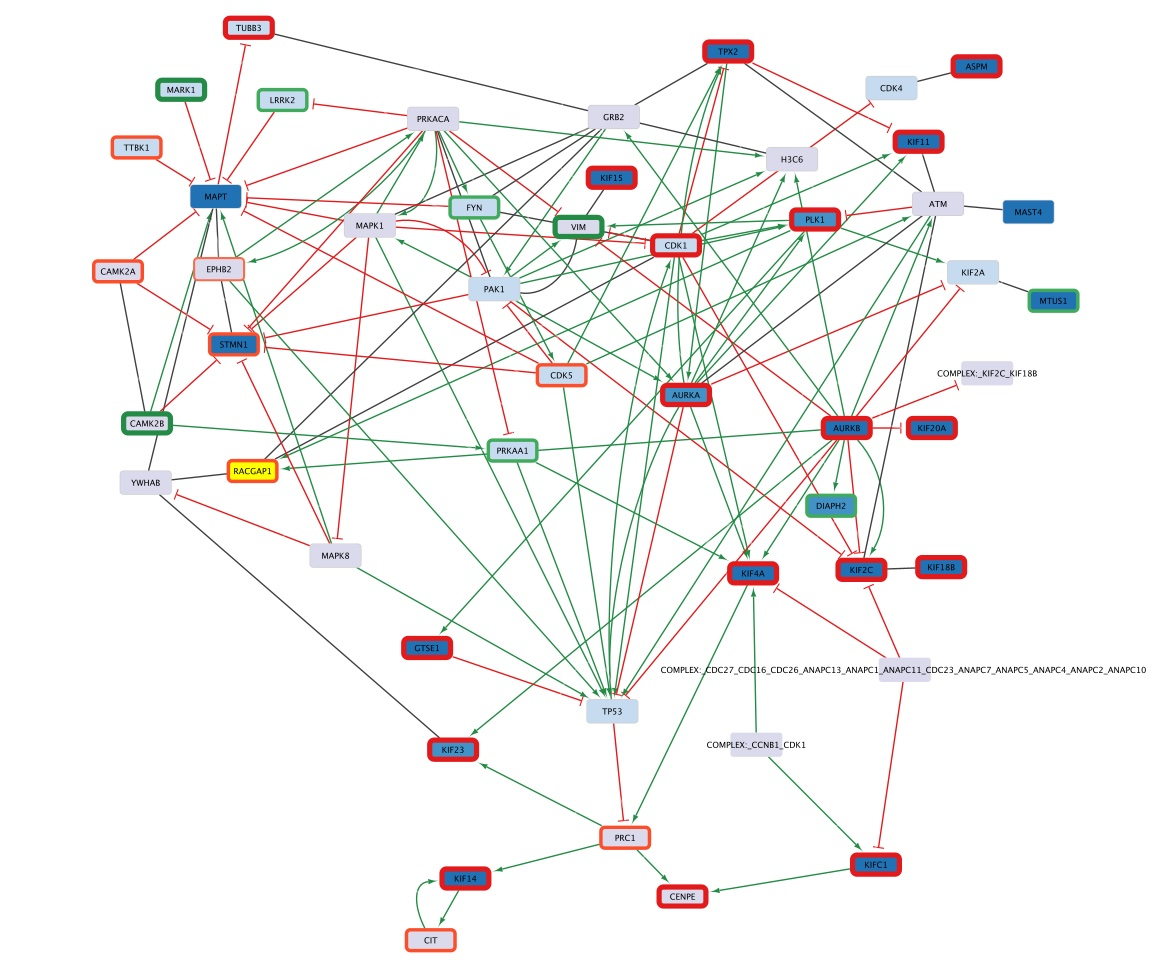

In [270]:
Image(filename='df_graph_17_qq_1voisin_4.jpg')